In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# --- Utility Functions ---

def show_side_by_side(original, preview, title='Preview'):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original')
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(preview, cv2.COLOR_BGR2RGB))
    axes[1].set_title(title)
    axes[1].axis('off')
    plt.show()

In [11]:
# --- Image Operations ---

def adjust_brightness_contrast(img, brightness=0, contrast=0):
    new_img = cv2.convertScaleAbs(img, alpha=1 + contrast / 100.0, beta=brightness)
    return new_img

def pad_image(img, pad_size, border_type, aspect=None):
    h, w = img.shape[:2]
    pad_top = pad_bottom = pad_left = pad_right = pad_size

    if aspect:
        # Calculate target size to match aspect ratio
        ratio_w, ratio_h = aspect
        target_w = w
        target_h = h
        if w / h < ratio_w / ratio_h:
            target_w = int(h * ratio_w / ratio_h)
        else:
            target_h = int(w * ratio_h / ratio_w)
        pad_left = (target_w - w) // 2
        pad_right = target_w - w - pad_left
        pad_top = (target_h - h) // 2
        pad_bottom = target_h - h - pad_top
        # Add extra user padding
        pad_top += pad_size
        pad_bottom += pad_size
        pad_left += pad_size
        pad_right += pad_size

    border_types = {
        'constant': cv2.BORDER_CONSTANT,
        'reflect': cv2.BORDER_REFLECT,
        'replicate': cv2.BORDER_REPLICATE
    }
    padded = cv2.copyMakeBorder(
        img, pad_top, pad_bottom, pad_left, pad_right,
        borderType=border_types[border_type], value=[0, 0, 0]
    )
    return padded, (pad_top, pad_bottom, pad_left, pad_right)

def threshold_image(img, method):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh_type = cv2.THRESH_BINARY if method == 'binary' else cv2.THRESH_BINARY_INV
    _, thresh = cv2.threshold(gray, 127, 255, thresh_type)
    thresh_bgr = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
    return thresh_bgr

def blend_images(img1, img2_path, alpha):
    img2 = cv2.imread(img2_path)
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    blend = ((1 - alpha) * img1 + alpha * img2).astype(np.uint8)
    return blend

In [12]:
# --- Main Application ---

def photo_editor():
    history = []
    log = []

    # Load image
    path = input("Enter image path: ")
    img = cv2.imread(path)
    if img is None:
        print("Image not found!")
        return
    current = img.copy()

    while True:
        show_side_by_side(img, current, title='Current Preview')
        print("\nMenu:")
        print("1. Brightness/Contrast")
        print("2. Padding")
        print("3. Thresholding")
        print("4. Blending")
        print("5. Undo")
        print("6. Show History Log")
        print("7. Exit")
        choice = input("Select option: ")
        
        if choice == '1':
            b = int(input("Brightness (-100 to 100): "))
            c = int(input("Contrast (-100 to 100): "))
            history.append(current.copy())
            current = adjust_brightness_contrast(current, b, c)
            log.append(f'brightness {b}, contrast {c}')
        elif choice == '2':
            pad_type = input("Padding type (constant/reflect/replicate): ")
            mode = input("Padding mode (square/rectangle/custom): ")
            if mode == 'custom':
                ratio = input("Enter custom ratio (e.g., 4:5): ")
                w, h = map(int, ratio.split(':'))
                aspect = (w, h)
            elif mode == 'square':
                aspect = (1, 1)
            elif mode == 'rectangle':
                aspect = (4, 5)
            else:
                aspect = None
            pad_size = int(input("Extra padding size (px): "))
            history.append(current.copy())
            padded, pads = pad_image(current, pad_size, pad_type, aspect)
            current = padded
            log.append(f'padded {pads[0]}px/{pads[1]}px/{pads[2]}px/{pads[3]}px with {pad_type} and aspect {aspect}')
        elif choice == '3':
            method = input("Threshold method (binary/inv): ")
            history.append(current.copy())
            current = threshold_image(current, 'binary' if method == 'binary' else 'inv')
            log.append(f'threshold {method}')
        elif choice == '4':
            img2_path = input("Enter second image path: ")
            a = float(input("Alpha (0-1): "))
            history.append(current.copy())
            current = blend_images(current, img2_path, a)
            log.append(f'blended with {img2_path} alpha={a}')
        elif choice == '5':
            if history:
                current = history.pop()
                log.append('undo')
            else:
                print("Nothing to undo.")
        elif choice == '6':
            print("\nHistory Log:")
            for entry in log:
                print(entry)
        elif choice == '7':
            save = input("Save final image? (y/n): ")
            if save.lower() == 'y':
                fname = input("Filename: ")
                cv2.imwrite(fname, current)
            print("\nHistory Log:")
            for entry in log:
                print(entry)
            break
        else:
            print("Invalid option. Try again.")

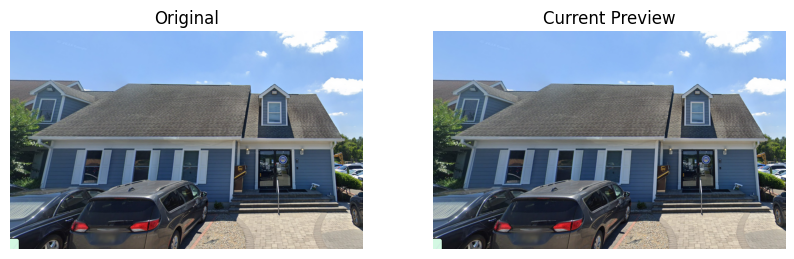


Menu:
1. Brightness/Contrast
2. Padding
3. Thresholding
4. Blending
5. Undo
6. Show History Log
7. Exit


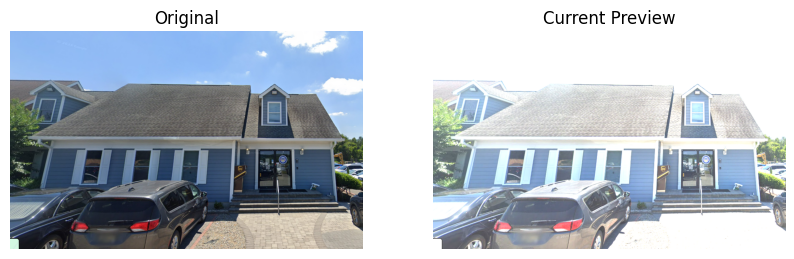


Menu:
1. Brightness/Contrast
2. Padding
3. Thresholding
4. Blending
5. Undo
6. Show History Log
7. Exit


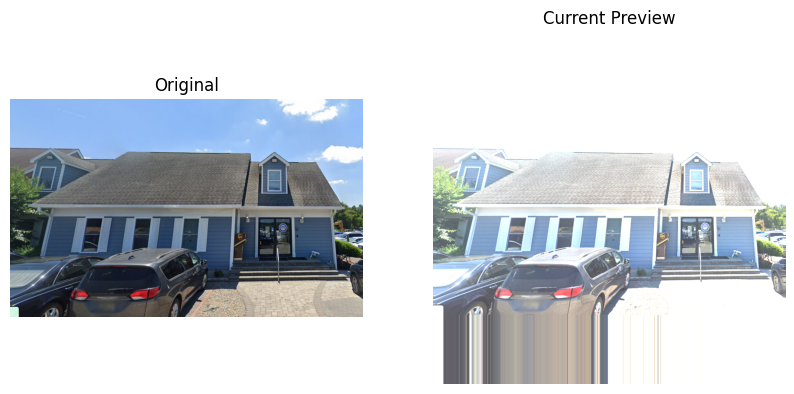


Menu:
1. Brightness/Contrast
2. Padding
3. Thresholding
4. Blending
5. Undo
6. Show History Log
7. Exit


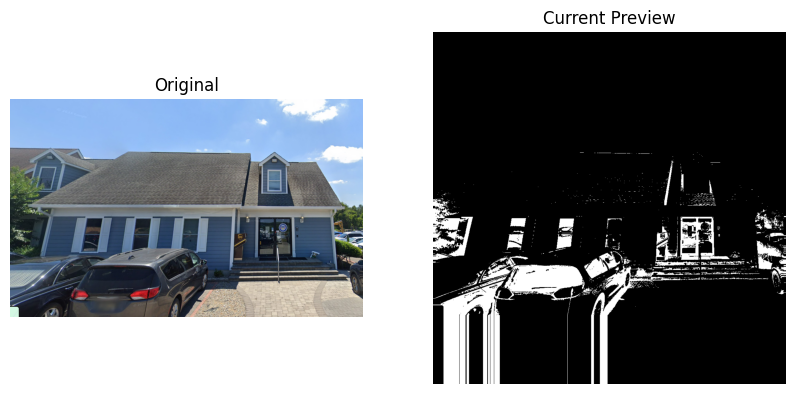


Menu:
1. Brightness/Contrast
2. Padding
3. Thresholding
4. Blending
5. Undo
6. Show History Log
7. Exit


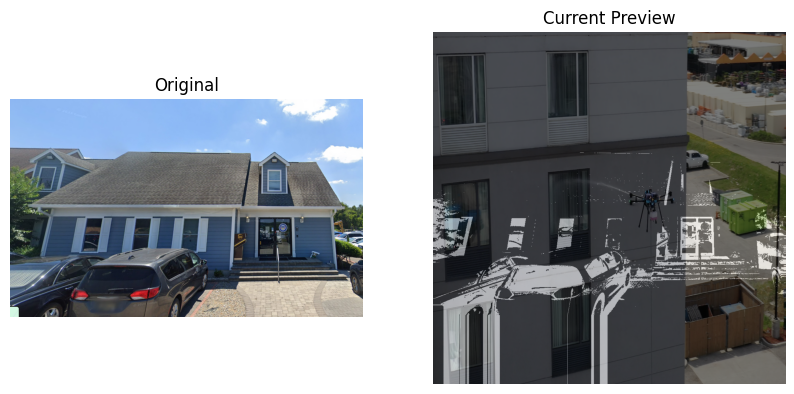


Menu:
1. Brightness/Contrast
2. Padding
3. Thresholding
4. Blending
5. Undo
6. Show History Log
7. Exit


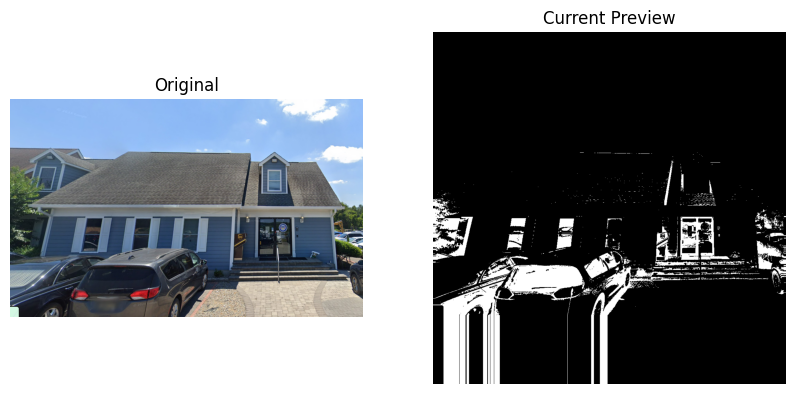


Menu:
1. Brightness/Contrast
2. Padding
3. Thresholding
4. Blending
5. Undo
6. Show History Log
7. Exit

History Log:
brightness 70, contrast 40
padded 196px/196px/5px/5px with replicate and aspect (1, 1)
threshold inv
blended with window2.png alpha=0.5
undo


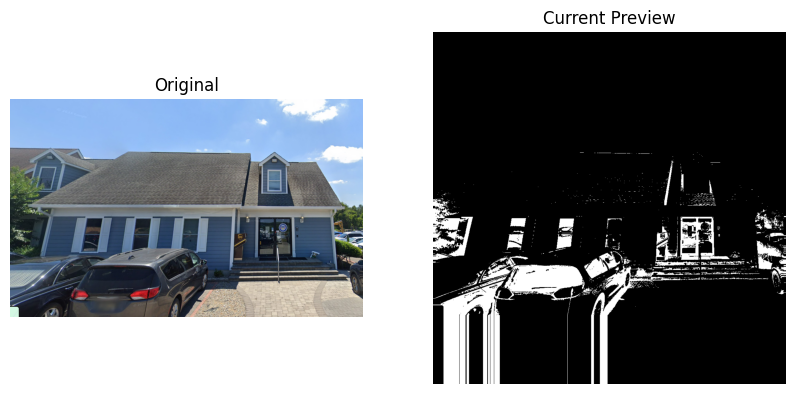


Menu:
1. Brightness/Contrast
2. Padding
3. Thresholding
4. Blending
5. Undo
6. Show History Log
7. Exit


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:836: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'


In [17]:
# Run the editor
photo_editor()